# Time-Series Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vega_datasets import data
from datetime import datetime
import os
import seaborn as sns

---

## Exercises

The end result of this exercise should be a file named acquire.py.

#### 1. Using the code from the lesson as a guide and the REST API from https://python.zgulde.net/api/v1/items as we did in the lesson, create a dataframe named items that has all of the data for items.
#### 2. Do the same thing, but for stores (https://python.zgulde.net/api/v1/stores)
#### 3. Extract the data for sales (https://python.zgulde.net/api/v1/sales). There are a lot of pages of data here, so your code will need to be a little more complex. Your code should continue fetching data from the next page until all of the data is extracted.
#### 4. Save the data in your files to local csv files so that it will be faster to access in the future.
#### 5. Combine the data from your three separate dataframes into one large dataframe.
#### 6. Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
#### 7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.

---

#### 1. Using the code from the lesson as a guide and the REST API from https://python.zgulde.net/api/v1/items as we did in the lesson, create a dataframe named items that has all of the data for items.

In [2]:
i = pd.read_csv('items.csv')
i

,Unnamed: 0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925
2,2,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
3,3,Boars Head,4,Boars Head Sliced White American Cheese - 120 Ct,3.14,208528800007,208528800007
4,4,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice ...,2.61,759283100036,759283100036
5,5,Sally Hansen,6,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,74170388732,74170388732
6,6,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004
7,7,Lea & Perrins,8,Lea & Perrins Marinade In-a-bag Cracked Pepper...,1.68,51600080015,51600080015
8,8,Van De Kamps,9,Van De Kamps Fillets Beer Battered - 10 Ct,1.79,19600923015,19600923015
9,9,Ahold,10,Ahold Cocoa Almonds,3.17,688267141676,688267141676


#### 2. Do the same thing, but for stores (https://python.zgulde.net/api/v1/stores)

In [3]:
store = pd.read_csv('store.csv')
store

,Unnamed: 0,store_address,store_city,store_id,store_state,store_zipcode
0,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,9255 FM 471 West,San Antonio,2,TX,78251
2,2,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
3,3,516 S Flores St,San Antonio,4,TX,78204
4,4,1520 Austin Hwy,San Antonio,5,TX,78218
5,5,1015 S WW White Rd,San Antonio,6,TX,78220
6,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
7,7,15000 San Pedro Ave,San Antonio,8,TX,78232
8,8,735 SW Military Dr,San Antonio,9,TX,78221
9,9,8503 NW Military Hwy,San Antonio,10,TX,78231


#### 3. Extract the data for sales (https://python.zgulde.net/api/v1/sales). There are a lot of pages of data here, so your code will need to be a little more complex. Your code should continue fetching data from the next page until all of the data is extracted.

In [4]:
si = pd.read_csv('sale_info.csv')
si

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1
...,...,...,...,...,...,...
912995,912995,50,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10
912996,912996,50,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10
912997,912997,50,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10
912998,912998,50,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10


#### 4. Save the data in your files to local csv files so that it will be faster to access in the future.

done

#### 5. Combine the data from your three separate dataframes into one large dataframe.

In [5]:
store_info = pd.read_csv('store_info.csv')
store_info

,sale_date,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
0,2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
1,2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,9.24
2,2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,11.76
3,2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
4,2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,63.0,912996,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231,12,2017,327.60
912996,2017-12-28,59.0,912997,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231,12,2017,306.80
912997,2017-12-29,74.0,912998,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231,12,2017,384.80
912998,2017-12-30,62.0,912999,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221,8503 NW Military Hwy,San Antonio,10,TX,78231,12,2017,322.40


#### 6. Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [6]:
OPSD = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [7]:
OPSD

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [8]:
OPSD.to_csv('OPSD.csv')

#### 7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.

👍

---

---

## Exercises: 

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

**from vega_datasets import data<br>
data.sf_temps()**

Use the above dataset for the exercises below:

#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.
#### 2. Write the code necessary to visualize the minimum temperature over time.
#### 3. Write the code necessary to visualize the maximum temperature over time.
#### 4. Which month is the coldest, on average?
#### 5. Which month has the highest average temperature?
#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

-------------

**from vega_datasets import data<br>
data.seattle_weather()**

#### Which year and month combination has the highest amount of precipitation?
#### Visualize the amount of monthly precipitation over time.
#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.
#### Which year-month combination is the windiest?
#### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
#### In which month does it rain the most?
#### Which month has the most number of days with a non-zero amount of precipitation?

---------

data.flights_20k()

Convert any negative delays to 0.
Which hour of the day has the highest average delay?
Does the day of the week make a difference in the delay amount?
Does the month make a difference in the delay amount?
Bonus

from vega_datasets import data
data.iowa_electricity()

For each row, calculate the percentage of the year's total that energy source provided.
Lineplot of generation over time, color by source
Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
Is the total generation increasing over time?
How would you control for increasing consumption over time when considering how much energy is coming from each source?
express each number as a % of the year's total
Use the sf_temps dataset
Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
Create pretty labels for time plots
Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar
Explore the birdstrikes dataset.


df = data.birdstrikes()

---

### SF Temps

#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [9]:
temps = data.sf_temps()
temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [10]:
#add them all
temps['year'] = temps.date.dt.year
temps['month'] = temps.date.dt.month
temps['day'] = temps.date.dt.day

In [11]:
temps

,temp,date,year,month,day
0,47.8,2010-01-01 00:00:00,2010,1,1
1,47.4,2010-01-01 01:00:00,2010,1,1
2,46.9,2010-01-01 02:00:00,2010,1,1
3,46.5,2010-01-01 03:00:00,2010,1,1
4,46.0,2010-01-01 04:00:00,2010,1,1
...,...,...,...,...,...
8754,50.4,2010-12-31 19:00:00,2010,12,31
8755,49.9,2010-12-31 20:00:00,2010,12,31
8756,49.4,2010-12-31 21:00:00,2010,12,31
8757,48.8,2010-12-31 22:00:00,2010,12,31


In [12]:
temps = temps.set_index('date')
temps

,temp,year,month,day
date,,,,
2010-01-01 00:00:00,47.8,2010,1,1
2010-01-01 01:00:00,47.4,2010,1,1
2010-01-01 02:00:00,46.9,2010,1,1
2010-01-01 03:00:00,46.5,2010,1,1
2010-01-01 04:00:00,46.0,2010,1,1
...,...,...,...,...
2010-12-31 19:00:00,50.4,2010,12,31
2010-12-31 20:00:00,49.9,2010,12,31
2010-12-31 21:00:00,49.4,2010,12,31


In [13]:
temps.resample('D').mean()

,temp,year,month,day
date,,,,
2010-01-01,49.170833,2010.0,1.0,1.0
2010-01-02,49.304167,2010.0,1.0,2.0
2010-01-03,49.391667,2010.0,1.0,3.0
2010-01-04,49.445833,2010.0,1.0,4.0
2010-01-05,49.491667,2010.0,1.0,5.0
...,...,...,...,...
2010-12-27,48.991667,2010.0,12.0,27.0
2010-12-28,49.000000,2010.0,12.0,28.0
2010-12-29,49.012500,2010.0,12.0,29.0


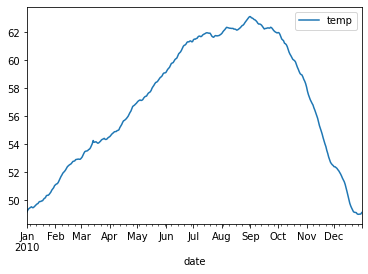

In [14]:
temps[['temp']].resample('D').mean().plot()
plt.show()

#### 2. Write the code necessary to visualize the minimum temperature over time.

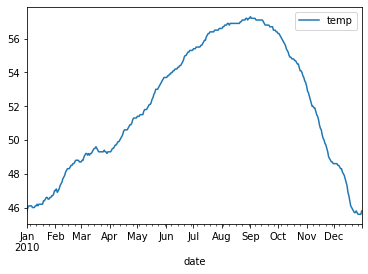

In [15]:
temps[['temp']].resample('D').min().plot()
plt.show()

#### 3. Write the code necessary to visualize the maximum temperature over time.

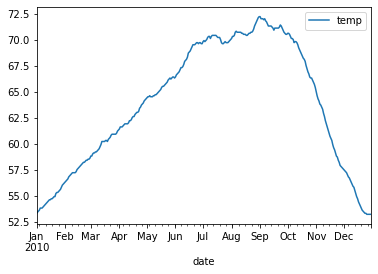

In [16]:
temps[['temp']].resample('D').max().plot()
plt.show()

#### 4. Which month is the coldest, on average?

In [17]:
temps[['temp', 'month']].groupby('month').mean()

,temp
month,
1,49.984140
2,52.243899
3,53.956528
4,55.633056
5,57.970968
6,60.444722
7,61.765457
8,62.405376
9,62.487083


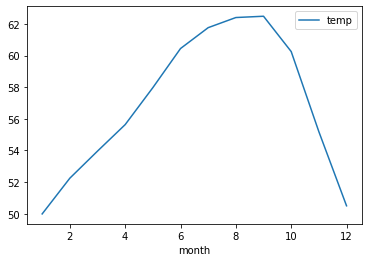

In [18]:
temps[['temp', 'month']].groupby('month').mean().plot()
plt.show()

#### 5. Which month has the highest average temperature?

In [19]:
temps[['temp', 'month']].groupby('month').mean().idxmax()

temp    9
dtype: int64

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [20]:
df = temps.resample('D').agg(['min', 'max']).temp
df

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [21]:
df['difference'] = (temps.resample('D').agg(['min', 'max']).temp)['max'] - (temps.resample('D').agg(['min', 'max']).temp)['min']

In [22]:
df

,min,max,difference
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [23]:
temps['difference'] = df['difference']

#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [24]:
df.resample('D').agg(['min', 'max', 'mean'])

min               max             difference          
             min   max  mean   min   max  mean        min  max mean
date                                                               
2010-01-01  45.8  45.8  45.8  53.3  53.3  53.3        7.5  7.5  7.5
2010-01-02  46.0  46.0  46.0  53.4  53.4  53.4        7.4  7.4  7.4
2010-01-03  46.1  46.1  46.1  53.5  53.5  53.5        7.4  7.4  7.4
2010-01-04  46.1  46.1  46.1  53.6  53.6  53.6        7.5  7.5  7.5
2010-01-05  46.1  46.1  46.1  53.8  53.8  53.8        7.7  7.7  7.7
...          ...   ...   ...   ...   ...   ...        ...  ...  ...
2010-12-27  45.6  45.6  45.6  53.2  53.2  53.2        7.6  7.6  7.6
2010-12-28  45.6  45.6  45.6  53.2  53.2  53.2        7.6  7.6  7.6
2010-12-29  45.6  45.6  45.6  53.2  53.2  53.2        7.6  7.6  7.6
2010-12-30  45.6  45.6  45.6  53.2  53.2  53.2        7.6  7.6  7.6
2010-12-31  45.8  45.8  45.8  53.2  53.2  53.2        7.4  7.4  7.4

[365 rows x 9 columns]

<AxesSubplot:xlabel='date'>

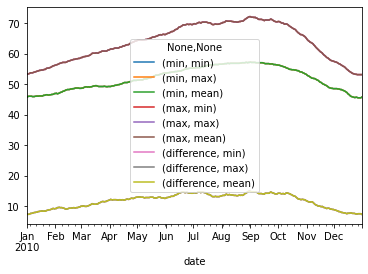

In [25]:
df.resample('D').agg(['min', 'max', 'mean']).plot()

In [26]:
df[['min', 'max']].head(3)

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5


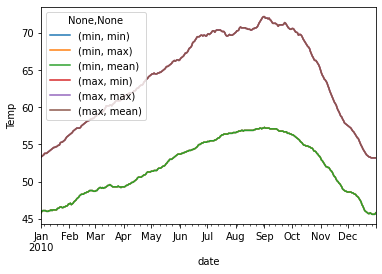

In [27]:
#plt.figure(figsize=(16,9))
df[['min', 'max']].resample('D').agg(['min', 'max', 'mean']).plot()
plt.ylabel('Temp')
plt.show()

---

## Seattle Weather

In [28]:
se = data.seattle_weather()
se

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


#### Which year and month combination has the highest amount of precipitation?

In [29]:
se['year'] = se.date.dt.year
se['month'] = se.date.dt.month
se['day'] = se.date.dt.day

In [30]:
se.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


In [31]:
se = se.set_index('date')

In [32]:
se.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


#### Visualize the amount of monthly precipitation over time.

In [33]:
se[['precipitation']].resample('M').mean()

,precipitation
date,
2012-01-31,5.590323
2012-02-29,3.182759
2012-03-31,5.903226
2012-04-30,2.270000
2012-05-31,1.683871
2012-06-30,2.503333
2012-07-31,0.848387
2012-08-31,0.000000
2012-09-30,0.030000


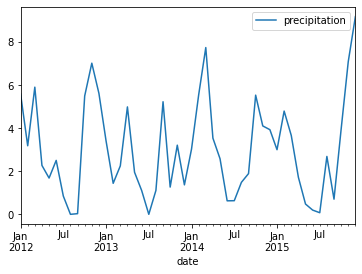

In [34]:
se[['precipitation']].resample('M').mean().plot()
plt.show()

In [35]:
se[['precipitation']].resample('M').max().idxmax()

precipitation   2015-03-31
dtype: datetime64[ns]

#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

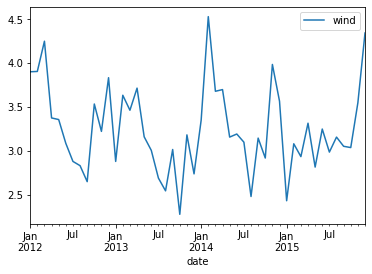

In [36]:
se[['wind']].resample('M').mean().plot()
plt.show()

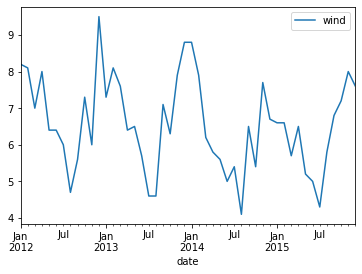

In [37]:
se[['wind']].resample('M').max().plot()
plt.show()

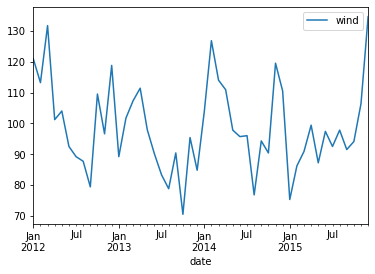

In [38]:
se[['wind']].resample('M').sum().plot()
plt.show()

In [39]:
se

,precipitation,temp_max,temp_min,wind,weather,year,month,day
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,2015,12,27
2015-12-28,1.5,5.0,1.7,1.3,fog,2015,12,28
2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29


In [40]:
se.groupby('month').sum()

,precipitation,temp_max,temp_min,wind,year,day
month,,,,,,
1,466.0,1020.4,334.4,389.2,249674,1984
2,422.0,1114.2,458.2,427.9,227524,1653
3,606.2,1536.0,602.5,443.9,249674,1984
4,375.4,1802.4,763.5,422.9,241620,1860
5,207.5,2392.7,1192.2,386.9,249674,1984
6,132.9,2688.0,1469.3,375.7,241620,1860
7,48.2,3223.8,1760.5,361.0,249674,1984
8,163.7,3237.9,1831.4,341.1,249674,1984
9,235.5,2630.9,1483.0,355.6,241620,1860


#### Which year-month combination is the windiest?

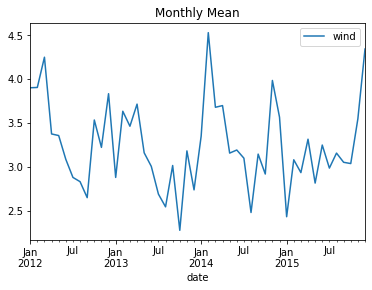

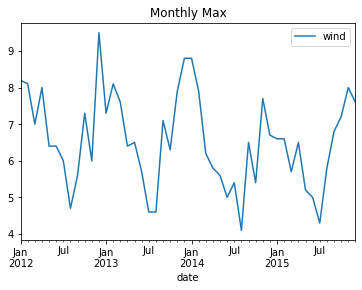

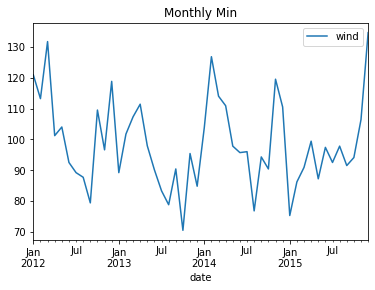

In [41]:
se[['wind']].resample('M').mean().plot()
plt.title('Monthly Mean')
plt.show()

se[['wind']].resample('M').max().plot()
plt.title('Monthly Max')
plt.show()

se[['wind']].resample('M').sum().plot()
plt.title('Monthly Min')
plt.show()

In [42]:
print(se[['wind']].resample('W').sum().idxmax())
print(se[['wind']].resample('W').mean().idxmax())
print(se[['wind']].resample('W').max().idxmax())

print('----')

print(se[['wind']].resample('M').sum().idxmax())
print(se[['wind']].resample('M').mean().idxmax())
print(se[['wind']].resample('M').max().idxmax())

wind   2014-02-16
dtype: datetime64[ns]
wind   2014-02-16
dtype: datetime64[ns]
wind   2012-12-23
dtype: datetime64[ns]
----
wind   2015-12-31
dtype: datetime64[ns]
wind   2014-02-28
dtype: datetime64[ns]
wind   2012-12-31
dtype: datetime64[ns]


### Either December 2015 or it could be argued for Feb 2014

#### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [43]:
se.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [44]:
(se.weather == 'sun').sum()

714

In [45]:
(se[['weather']] == 'sun')

,weather
date,
2012-01-01,False
2012-01-02,False
2012-01-03,False
2012-01-04,False
2012-01-05,False
...,...
2015-12-27,False
2015-12-28,False
2015-12-29,False


In [46]:
se[se['weather'] == 'sun'].year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: year, dtype: int64

Other Method:

df['is_sunny'] = (df.weather == 'sun')

df['year'] = df.index.year

df.groupby('year').sum().is_sunny.sort_values().tail(1)

#### In which month does it rain the most?

In [47]:
se[se['weather'] == 'rain'].month.value_counts()

2     40
3     37
1     35
11    25
12    23
4     20
10    20
6     19
5     16
7     14
8      6
9      4
Name: month, dtype: int64

### February

In [48]:
se['is_rainy'] = se.weather == 'rain'

In [49]:
se.groupby('month').sum().is_rainy.idxmax()

2

In [50]:
se.groupby('month').sum().is_rainy.max()

40

#### Which month has the most number of days with a non-zero amount of precipitation?

In [51]:
se[se.precipitation > 0].groupby('month').sum()

,precipitation,temp_max,temp_min,wind,year,day,is_rainy
month,,,,,,,
1,466.0,567.4,250.8,255.9,132877,1045,32
2,422.0,712.4,359.8,283.0,146983,1075,34
3,606.2,841.8,399.3,286.2,146979,1178,31
4,375.4,772.2,384.1,234.8,118789,938,17
5,207.5,525.0,317.2,118.0,68448,545,10
6,132.9,717.8,445.5,119.8,74484,620,14
7,48.2,236.6,142.2,33.5,22142,180,7
8,163.7,528.7,344.5,59.0,44305,423,3
9,235.5,675.1,456.6,122.2,70479,590,3


Feb has 34 days with rain

In [52]:
se[se.precipitation > 0].groupby('month').sum().is_rainy.idxmax()

2

In [53]:
se['is_precipitation'] = se.precipitation > 0

In [54]:
se.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day,is_rainy,is_precipitation
date,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2,True,True
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3,True,True
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4,True,True
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5,True,True


In [55]:
se.groupby('month').sum().is_precipitation.idxmax()

12

---

data.flights_20k()

Convert any negative delays to 0.
Which hour of the day has the highest average delay?
Does the day of the week make a difference in the delay amount?
Does the month make a difference in the delay amount?
Bonus

In [56]:
f = data.flights_20k()
f

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [57]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [58]:
f = f.set_index('date')

In [59]:
f

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,-6,1489,SEA,MCI
2001-02-07 11:37:00,-16,1848,MCO,PHX


#### Convert any negative delays to 0.

In [60]:
f[f.delay < 0]

,delay,distance,origin,destination
date,,,,
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND
2001-01-27 07:00:00,-13,588,BNA,BWI
2001-01-02 11:40:00,-1,395,MDW,BNA
...,...,...,...,...
2001-01-16 13:40:00,-8,223,BUR,LAS
2001-01-26 13:50:00,-10,534,RDU,MCO
2001-03-17 07:00:00,-15,256,LAS,PHX


In [61]:
f['delay'] = np.where(f.delay < 0, 0, f.delay)

In [62]:
f.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


#### Which hour of the day has the highest average delay?

In [63]:
f['hour'] = f.index.hour
f['day'] = f.index.day

In [64]:
f.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,13
2001-01-31 16:40:00,0,1093,FLL,ISP,16,31
2001-02-11 18:39:00,3,293,LBB,DAL,18,11
2001-01-10 21:00:00,0,550,MSY,MCO,21,10
2001-03-30 21:45:00,0,229,STL,IND,21,30


In [65]:
f.groupby('hour').mean()

,delay,distance,day
hour,,,
0,127.916667,424.583333,15.833333
1,170.000000,256.000000,26.000000
3,302.500000,322.000000,12.500000
5,0.513514,327.702703,14.324324
6,2.494856,448.913580,15.192387
7,3.071932,530.179126,15.401975
8,4.030483,558.536059,15.553903
9,5.002504,563.075125,15.373957
10,5.850953,513.748700,15.317158


In [66]:
f.groupby('hour').mean().delay.idxmax()

3

#### Does the day of the week make a difference in the delay amount?

In [67]:
f['weekday'] = f.index.day_name()

In [68]:
f.groupby('weekday').mean().delay.sort_values()

weekday
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

##### yes

#### Does the month make a difference in the delay amount?

In [69]:
f.groupby(f.index.month).mean()

,delay,distance,hour,day
date,,,,
1,11.301592,500.391952,13.552771,16.081515
2,12.306106,511.156170,13.644182,14.325767
3,9.875287,504.712069,13.531897,15.973276


##### yes

---

## Bonus
data.iowa_electricity()

Use the sf_temps dataset
Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
Create pretty labels for time plots
Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [70]:
el = data.iowa_electricity()
el

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750


For each row, calculate the percentage of the year's total that energy source provided.

In [71]:
#add them all
el['month'] = el.year.dt.month
el['day'] = el.year.dt.day

In [72]:
el = el.set_index('year')

In [73]:
el.head()

,source,net_generation,month,day
year,,,,
2001-01-01,Fossil Fuels,35361,1,1
2002-01-01,Fossil Fuels,35991,1,1
2003-01-01,Fossil Fuels,36234,1,1
2004-01-01,Fossil Fuels,36205,1,1
2005-01-01,Fossil Fuels,36883,1,1


In [74]:
el['weekday'] = el.index.day_name()

In [75]:
el.head()

,source,net_generation,month,day,weekday
year,,,,,
2001-01-01,Fossil Fuels,35361,1,1,Monday
2002-01-01,Fossil Fuels,35991,1,1,Tuesday
2003-01-01,Fossil Fuels,36234,1,1,Wednesday
2004-01-01,Fossil Fuels,36205,1,1,Thursday
2005-01-01,Fossil Fuels,36883,1,1,Saturday


#### Lineplot of generation over time, color by source

In [76]:
el.resample('Y').net_generation.sum()

year
2001-12-31    40651
2002-12-31    42528
2003-12-31    42107
2004-12-31    43236
2005-12-31    44145
2006-12-31    45473
2007-12-31    49778
2008-12-31    53086
2009-12-31    51859
2010-12-31    57509
2011-12-31    56371
2012-12-31    56675
2013-12-31    56670
2014-12-31    56854
2015-12-31    56653
2016-12-31    54381
2017-12-31    56476
Freq: A-DEC, Name: net_generation, dtype: int64

<AxesSubplot:xlabel='year'>

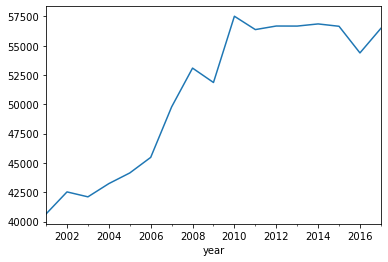

In [77]:
el.resample('Y').net_generation.sum().plot()

#### Q: Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [78]:
el.head(3)

,source,net_generation,month,day,weekday
year,,,,,
2001-01-01,Fossil Fuels,35361,1,1,Monday
2002-01-01,Fossil Fuels,35991,1,1,Tuesday
2003-01-01,Fossil Fuels,36234,1,1,Wednesday


In [79]:
pd.pivot_table(data=el, columns=('year'), index='source', values='net_generation')

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


In [80]:
el.head()

,source,net_generation,month,day,weekday
year,,,,,
2001-01-01,Fossil Fuels,35361,1,1,Monday
2002-01-01,Fossil Fuels,35991,1,1,Tuesday
2003-01-01,Fossil Fuels,36234,1,1,Wednesday
2004-01-01,Fossil Fuels,36205,1,1,Thursday
2005-01-01,Fossil Fuels,36883,1,1,Saturday


In [81]:
el['y'] = el.index.year

In [82]:
el.head()

,source,net_generation,month,day,weekday,y
year,,,,,,
2001-01-01,Fossil Fuels,35361,1,1,Monday,2001
2002-01-01,Fossil Fuels,35991,1,1,Tuesday,2002
2003-01-01,Fossil Fuels,36234,1,1,Wednesday,2003
2004-01-01,Fossil Fuels,36205,1,1,Thursday,2004
2005-01-01,Fossil Fuels,36883,1,1,Saturday,2005


In [83]:
p = pd.pivot_table(data=el, columns=('y'), index='source', values='net_generation')
p

y,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


In [84]:
el[['source']].value_counts()

source        
Fossil Fuels      17
Nuclear Energy    17
Renewables        17
dtype: int64

In [85]:
#temps.resample('D').agg(['min','max']).temp

#### Q: Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

In [86]:
el[el.source == 'Renewables'].resample('Y').sum()

,net_generation,month,day,y
year,,,,
2001-12-31,1437,1,1,2001
2002-12-31,1963,1,1,2002
2003-12-31,1885,1,1,2003
2004-12-31,2102,1,1,2004
2005-12-31,2724,1,1,2005
2006-12-31,3364,1,1,2006
2007-12-31,3870,1,1,2007
2008-12-31,5070,1,1,2008
2009-12-31,8560,1,1,2009


In [87]:
el[el.source == 'Nuclear Energy'].resample('Y').sum()

,net_generation,month,day,y
year,,,,
2001-12-31,3853,1,1,2001
2002-12-31,4574,1,1,2002
2003-12-31,3988,1,1,2003
2004-12-31,4929,1,1,2004
2005-12-31,4538,1,1,2005
2006-12-31,5095,1,1,2006
2007-12-31,4519,1,1,2007
2008-12-31,5282,1,1,2008
2009-12-31,4679,1,1,2009


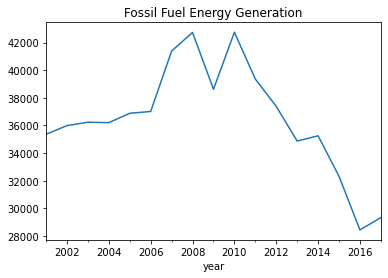

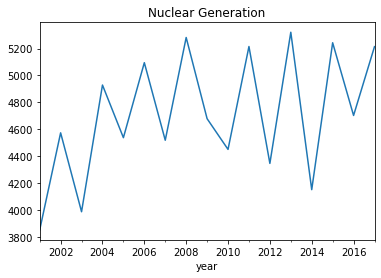

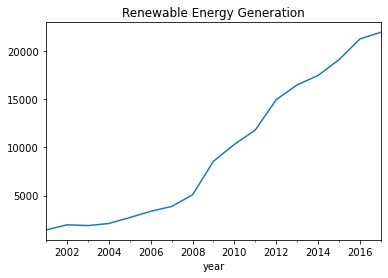

In [88]:
el.net_generation[el.source == 'Fossil Fuels'].plot()
plt.title('Fossil Fuel Energy Generation')
plt.show()

el.net_generation[el.source == 'Nuclear Energy'].plot()
plt.title('Nuclear Generation')
plt.show()

el.net_generation[el.source == 'Renewables'].plot()
plt.title('Renewable Energy Generation')
plt.show()

#### Q: Is the total generation increasing over time?

### Only for renewable energy sources

#### Q: How would you control for increasing consumption over time when considering how much energy is coming from each source?

I don't understand this question

#### Q: express each number as a % of the year's total

In [89]:
el.drop(columns={'month', 'day'}).groupby('y').sum()

,net_generation
y,
2001,40651
2002,42528
2003,42107
2004,43236
2005,44145
2006,45473
2007,49778
2008,53086
2009,51859


In [90]:
p

y,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


In [91]:
p[2001]

source
Fossil Fuels      35361
Nuclear Energy     3853
Renewables         1437
Name: 2001, dtype: int64

In [92]:
el.groupby('y').net_generation.value_counts()

y     net_generation
2001  1437              1
      3853              1
      35361             1
2002  1963              1
      4574              1
      35991             1
2003  1885              1
      3988              1
      36234             1
2004  2102              1
      4929              1
      36205             1
2005  2724              1
      4538              1
      36883             1
2006  3364              1
      5095              1
      37014             1
2007  3870              1
      4519              1
      41389             1
2008  5070              1
      5282              1
      42734             1
2009  4679              1
      8560              1
      38620             1
2010  4451              1
      10308             1
      42750             1
2011  5215              1
      11795             1
      39361             1
2012  4347              1
      14949             1
      37379             1
2013  5321              1
      16476      

---

Explore the birdstrikes dataset.

df = data.birdstrikes()

---

In [93]:
import requests
from datetime import datetime

# Preparation:

### Exercises, The end result of this exercise should be a file named prepare.py.
#### Using your store items data:

In [94]:
store = pd.read_csv('store_info.csv')
#store.drop(columns='Unnamed: 0', inplace=True)

In [95]:
store.head()

,sale_date,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
0,2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
1,2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,9.24
2,2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,11.76
3,2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
4,2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,8.40


In [96]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   item_brand     913000 non-null  object 
 4   item_id        913000 non-null  int64  
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_id       913000 non-null  int64  
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  int64  
 14  month          913000 non-null  int64  
 15  year           913000 non-null  int64  
 16  sales_total    913000 non-null  float64
dtypes: float64(3), int64(8), obje

#### Convert date column to datetime format.

In [97]:
store.sale_date = store.sale_date.str.replace('00:00:00 GMT', '')

In [98]:
store.sale_date = pd.to_datetime(store.sale_date, format='%Y-%m-%d')

In [99]:
store.head()

,sale_date,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
0,2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
1,2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,9.24
2,2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,11.76
3,2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
4,2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,8.40


#### Plot the distribution of sale_amount and item_price.

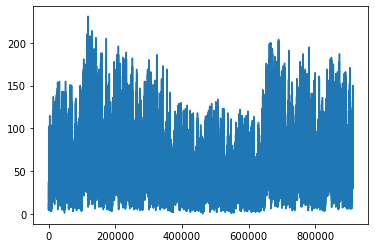

In [100]:
store.sale_amount.plot()
plt.show()

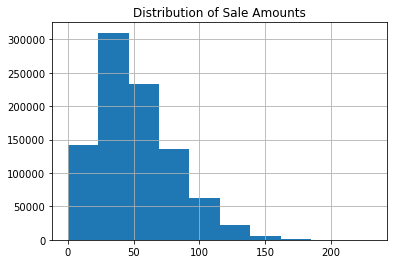

In [101]:
store.sale_amount.hist()
plt.title('Distribution of Sale Amounts')
plt.show()

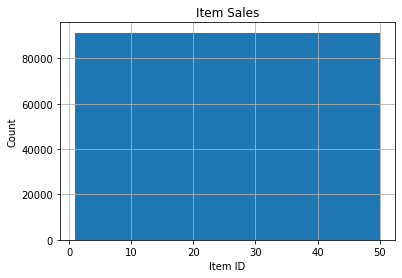

In [102]:
store.item_id.hist()
plt.title('Item Sales')
plt.xlabel('Item ID')
plt.ylabel('Count')
plt.show()

store.sales_total.hist()
plt.title('Item Sales')
plt.xlabel('Item ID')
plt.ylabel('Count')
plt.show()

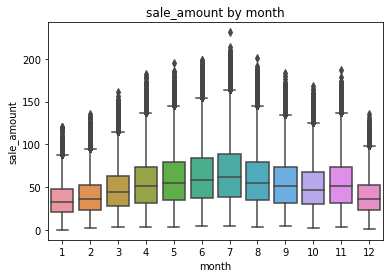

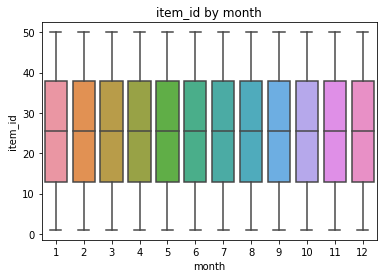

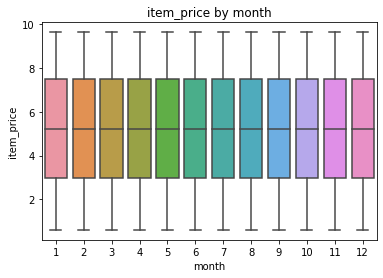

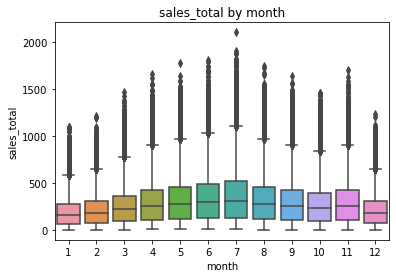

In [103]:
for val in ['sale_amount', 'item_id', 'item_price', 'sales_total']:
    sns.boxplot(data=store, y=val, x='month')
    plt.title(f'{val} by month')
    plt.show()

#### Set the index to be the datetime variable.

In [104]:
store = store.set_index('sale_date')
store.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,9.24
2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,11.76
2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,8.40


In [105]:
store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_id        913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_id        913000 non-null  int64  
 4   item_name      913000 non-null  object 
 5   item_price     913000 non-null  float64
 6   item_upc12     913000 non-null  int64  
 7   item_upc14     913000 non-null  int64  
 8   store_address  913000 non-null  object 
 9   store_city     913000 non-null  object 
 10  store_id       913000 non-null  int64  
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  year           913000 non-null  int64  
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(8), object(5)
memory usage: 118.4+ MB

#### Add a 'month' and 'day of week' column to your dataframe.

In [106]:
store['month'] = store.index.month
store['year'] = store.index.year
store.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,9.24
2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,11.76
2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,8.40


#### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [107]:
store['sales_total'] = store.sale_amount * store.item_price
store.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,9.24
2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,11.76
2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,8.40


In [108]:
store.to_csv('store_info.csv')

#### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [109]:
def get_items(url='https://python.zgulde.net/api/v1/items?page=1'):
    '''
    function to retrieve item data from website.
    accepts an url, returns a dataframe with items information
    '''
    max_page = requests.get(url).json()['payload']['max_page'] + 1
    for i in range(1,max_page):
        url = url[:-1] + str(i)
        if i == 1:
            output = pd.DataFrame(requests.get(url).json()['payload']['items'])
        else:
            output = pd.concat([output, pd.DataFrame(requests.get(url).json()['payload']['items'])], 
                               ignore_index=True)
    return output

###------------------------------###

def get_stores(url='https://python.zgulde.net/api/v1/stores'):
    '''
    function to retrieve store data from website.
    accepts an url, returns a dataframe with store information
    '''
    return pd.DataFrame(requests.get(url).json()['payload']['stores'])

###------------------------------###

def get_sales(url = 'https://python.zgulde.net/api/v1/sales?page='):
    '''
    function to retrieve sales data from website.
    accepts an url, returns a dataframe with sales information
    '''
    max_page = requests.get(url+'1').json()['payload']['max_page'] + 1
    for i in range(1,max_page):
        new_url = url + str(i)
        if i == 1:
            output = pd.DataFrame(requests.get(new_url).json()['payload']['sales'])
        else:
            output = pd.concat([output, pd.DataFrame(requests.get(new_url).json()['payload']['sales'])], 
                               ignore_index=True)
    return output

###------------------------------###

def combine(sales, stores, items):
    '''
    function to combine three dataframes of store data
    accepts 3 dataframes and returns them joined into one dataframe
    
    '''
    combo = sales.merge(items, left_on='item', right_on='item_id')
    combo = combo.merge(stores, left_on='store', right_on='store_id')
    combo.drop(columns=['item', 'store'], inplace=True)

    return combo

###------------------------------###

def thestore():
    '''
    Retrieve locally cached data .csv file for the superstore dataset
    If no locally cached file is present then retrieve sales, items, 
    and store dataframes from the web, merge them, cache the file as a csv, 
    and return the merged dataframe
    '''
    # if file is available locally, read it
    filename = 'store_info.csv'
    if os.path.isfile(filename):
        return pd.read_csv(filename)

    else:
        # retrieve and combine data
        sales = get_sales()
        stores = get_stores()
        items = get_items()
        
        df = combine(sales, stores, items)

        # Write that dataframe to disk for later. This cached file will prevent repeated large queries to the database server.
        df.to_csv(filename, index=False)
    
    return df

---

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [110]:
OPSD.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [111]:
OPSD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


#### Convert date column to datetime format.

In [112]:
OPSD.Date = pd.to_datetime(OPSD.Date, format='%Y-%m-%d')
OPSD.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


#### Plot the distribution of each of your variables.

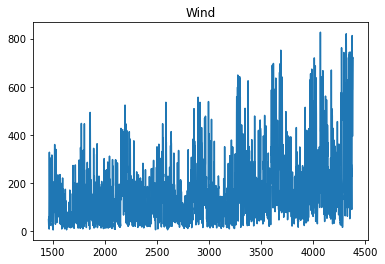

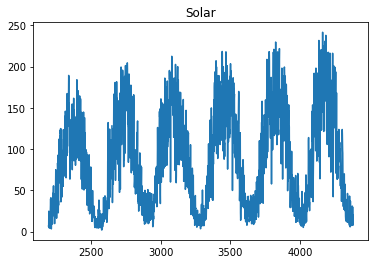

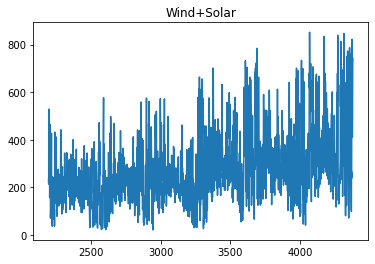

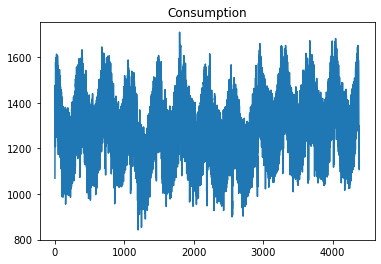

In [113]:
OPSD.Wind.plot()
plt.title('Wind')
plt.show()

OPSD.Solar.plot()
plt.title('Solar')
plt.show()

OPSD['Wind+Solar'].plot()
plt.title('Wind+Solar')
plt.show()

OPSD['Consumption'].plot()
plt.title('Consumption')
plt.show()

#### Set the index to be the datetime variable.

In [114]:
OPSD = OPSD.set_index('Date')
OPSD.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


#### Add a month and a year column to your dataframe.

In [115]:
OPSD['month'] = OPSD.index.month
OPSD['year'] = OPSD.index.year
OPSD.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


#### Fill any missing values

In [116]:
OPSD.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [117]:
OPSD.describe()

,Consumption,Wind,Solar,Wind+Solar,month,year
count,4383.000000,2920.000000,2188.000000,2187.000000,4383.000000,4383.000000
mean,1338.675836,164.814173,89.258695,272.663481,6.522930,2011.500342
std,165.775710,143.692732,58.550099,146.319884,3.449097,3.452347
min,842.395000,5.757000,1.968000,21.478000,1.000000,2006.000000
25%,1217.859000,62.353250,35.179250,172.185500,4.000000,2008.500000
50%,1367.123000,119.098000,86.407000,240.991000,7.000000,2012.000000
75%,1457.761000,217.900250,135.071500,338.988000,10.000000,2014.500000
max,1709.568000,826.278000,241.580000,851.556000,12.000000,2017.000000


In [118]:
for col in OPSD:
    #print(OPSD[col].value_counts())
    print(OPSD[col].mean())
    print(OPSD[col].median())
    print(OPSD[col].mode())
    print('----------')

1338.6758355897814
1367.1230000000005
0    1103.823
1    1109.639
2    1156.702
3    1246.850
4    1348.188
5    1350.439
6    1383.504
7    1393.554
8    1597.275
Name: Consumption, dtype: float64
----------
164.8141726027395
119.09799999999998
0     21.540
1     29.274
2     31.469
3     34.973
4     96.107
5    193.681
6    229.770
Name: Wind, dtype: float64
----------
89.25869469835473
86.407
0     40.042
1     85.920
2    188.273
Name: Solar, dtype: float64
----------
272.663481481481
240.991
0    187.626
1    259.146
Name: Wind+Solar, dtype: float64
----------
6.522929500342231
7.0
0     1
1     3
2     5
3     7
4     8
5    10
6    12
Name: month, dtype: int64
----------
2011.5003422313484
2012.0
0    2008
1    2012
2    2016
Name: year, dtype: int64
----------


In [119]:
OPSD.Wind.fillna(119.1, inplace=True)
OPSD.Solar.fillna(89.25, inplace=True)
OPSD['Wind+Solar'].fillna((OPSD.Wind + OPSD.Solar), inplace=True)
OPSD.isnull().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

In [120]:
OPSD.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,119.1,89.25,208.35,1,2006
2006-01-02,1380.521,119.1,89.25,208.35,1,2006
2006-01-03,1442.533,119.1,89.25,208.35,1,2006
2006-01-04,1457.217,119.1,89.25,208.35,1,2006
2006-01-05,1477.131,119.1,89.25,208.35,1,2006


#### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [121]:
def getnprep_OPSD():
    OPSD = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
    OPSD.Wind.fillna(119.1, inplace=True)
    OPSD.Solar.fillna(89.25, inplace=True)
    OPSD['Wind+Solar'].fillna(240.991, inplace=True)
    return OPSD

---

## Exercise
### Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [122]:
store = thestore()
store.head()

,sale_date,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
0,2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
1,2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,9.24
2,2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,11.76
3,2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
4,2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,8.40


In [123]:
store.sale_date = pd.to_datetime(store.sale_date, format='%Y-%m-%d')
store = store.set_index('sale_date')
store.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,9.24
2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,11.76
2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,8.40


In [124]:
len(store)

913000

In [125]:
print(len(store)*0.5)
print(len(store)*0.3)
print(len(store)*0.2)

456500.0
273900.0
182600.0


In [126]:
train = store[:456500]
validate = store[456500:(456500+273900)]
test= store[(456500+273900):]

In [127]:
train.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-02,11.0,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,9.24
2013-01-03,14.0,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,11.76
2013-01-04,13.0,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-05,10.0,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,8.40


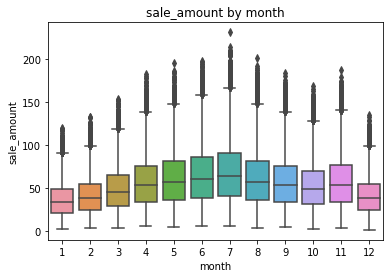

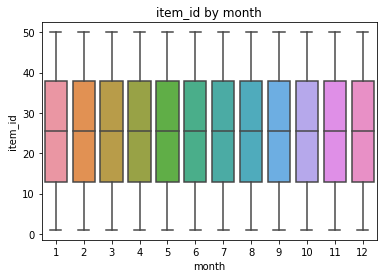

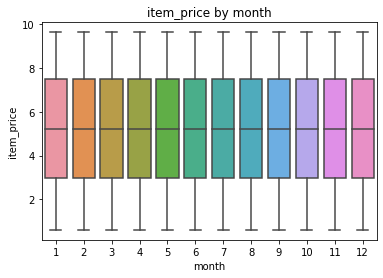

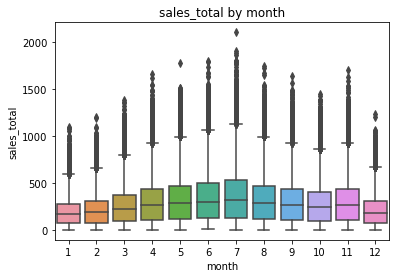

In [128]:
for val in ['sale_amount', 'item_id', 'item_price', 'sales_total']:
    sns.boxplot(data=train, y=val, x='month')
    plt.title(f'{val} by month')
    plt.show()

---

In [129]:
OPSD = getnprep_OPSD()
OPSD.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,119.1,89.25,240.991
1,2006-01-02,1380.521,119.1,89.25,240.991
2,2006-01-03,1442.533,119.1,89.25,240.991
3,2006-01-04,1457.217,119.1,89.25,240.991
4,2006-01-05,1477.131,119.1,89.25,240.991


In [130]:
OPSD = OPSD.set_index('Date')
OPSD.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,119.1,89.25,240.991
2006-01-02,1380.521,119.1,89.25,240.991
2006-01-03,1442.533,119.1,89.25,240.991
2006-01-04,1457.217,119.1,89.25,240.991
2006-01-05,1477.131,119.1,89.25,240.991


In [131]:
len(OPSD)

4383

In [132]:
print(len(OPSD)*0.5)
print(len(OPSD)*0.3)
print(len(OPSD)*0.2)

2191.5
1314.8999999999999
876.6


In [133]:
train = OPSD[:2191]
validate = OPSD[2191:(2191+1315)]
test= OPSD[(2191+1315):]

In [134]:
train.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,119.1,89.25,240.991
2006-01-02,1380.521,119.1,89.25,240.991
2006-01-03,1442.533,119.1,89.25,240.991


In [135]:
validate.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-01-01,948.128,227.465,6.587,234.052
2012-01-02,1269.581,207.327,6.574,213.901
2012-01-03,1334.745,473.468,24.679,498.147


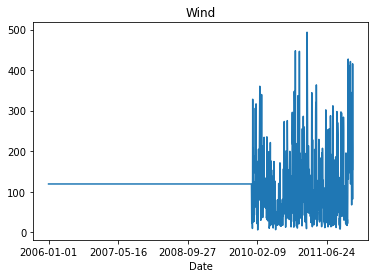

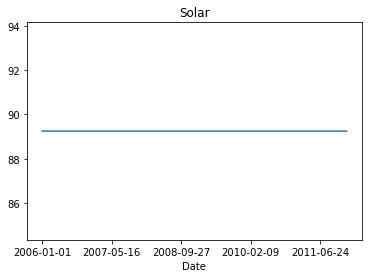

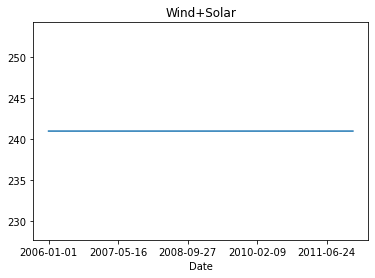

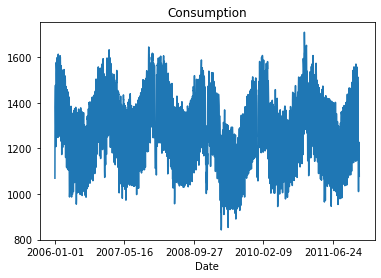

In [136]:
train.Wind.plot()
plt.title('Wind')
plt.show()

train.Solar.plot()
plt.title('Solar')
plt.show()

train['Wind+Solar'].plot()
plt.title('Wind+Solar')
plt.show()

train['Consumption'].plot()
plt.title('Consumption')
plt.show()

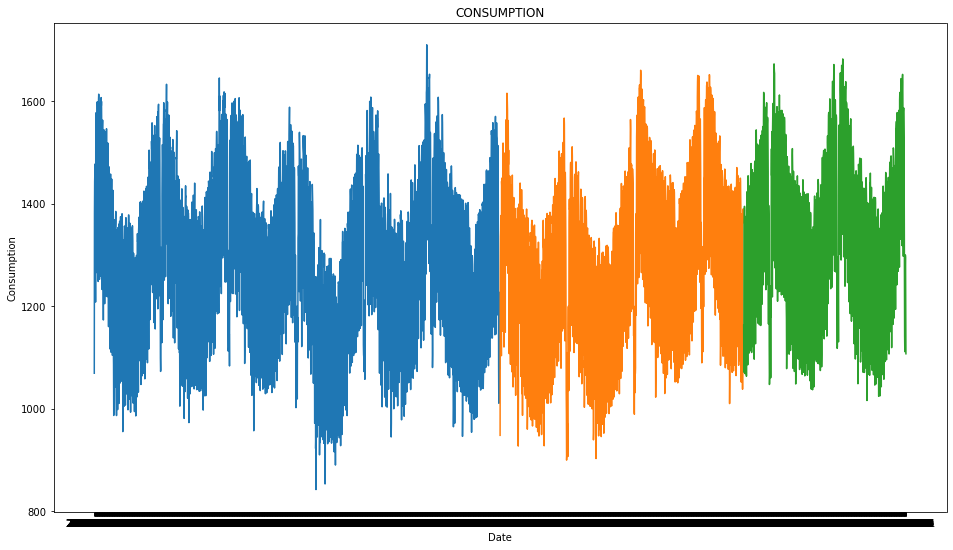

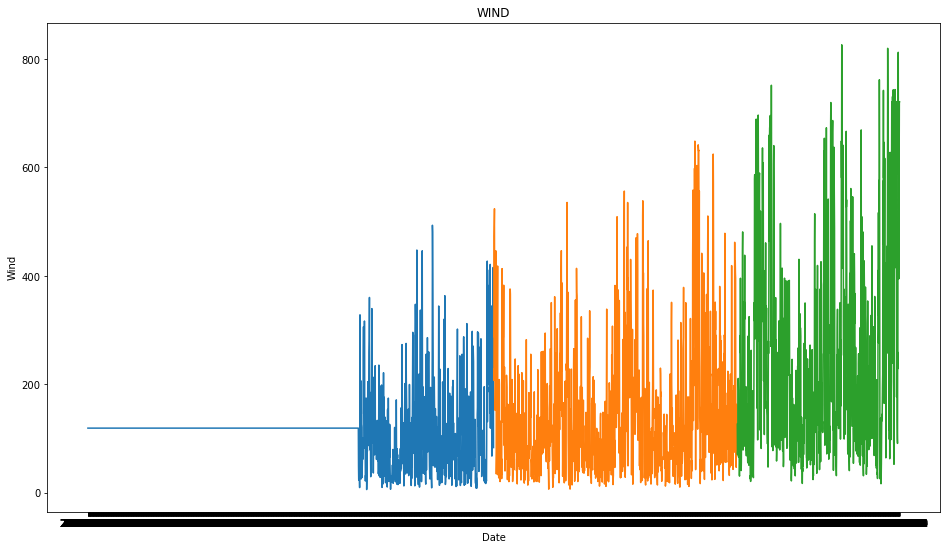

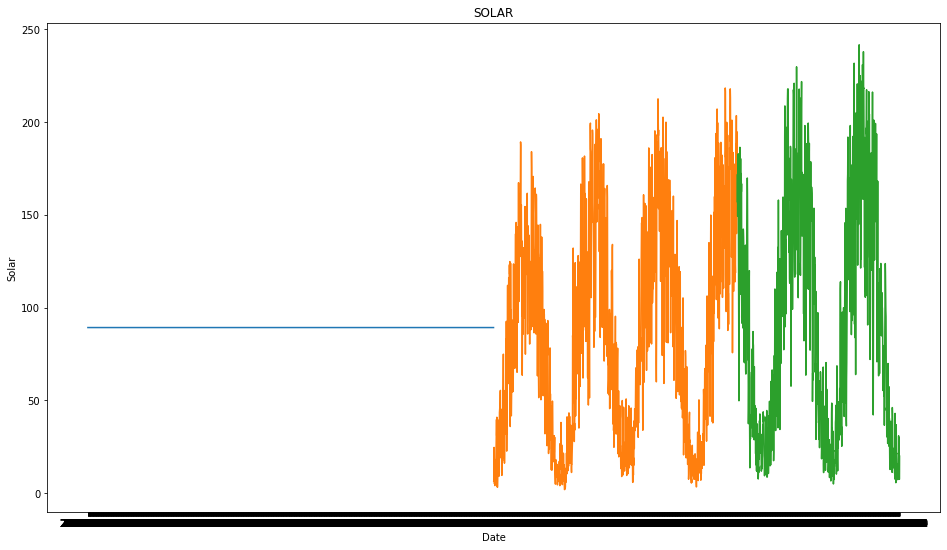

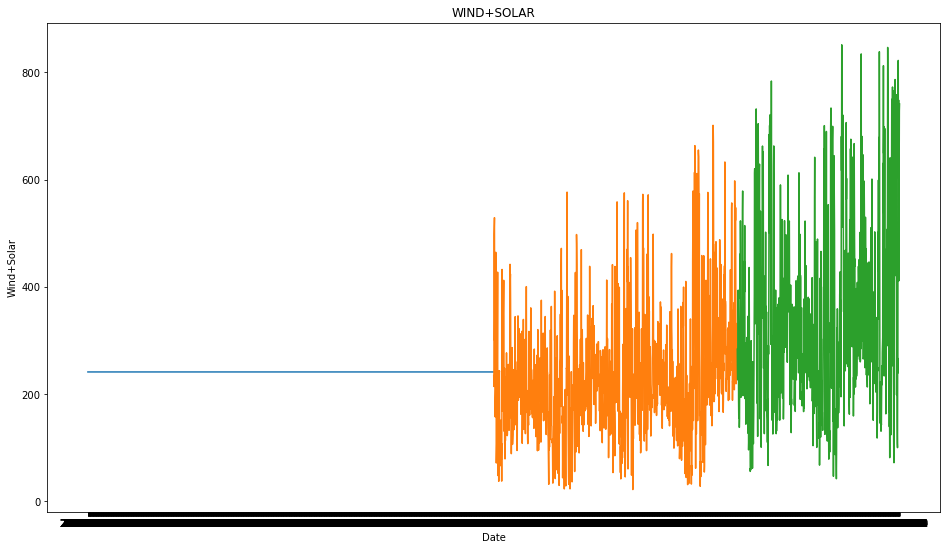

In [137]:
for col in train.columns:
    plt.figure(figsize=(16,9))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.xlabel('Date')
    plt.title(col.upper())
    plt.show()